In [ ]:
import pandas as pd
import requests
from datetime import timedelta
from sklearn.preprocessing import StandardScaler
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from scipy.stats import pearsonr
import matplotlib.pyplot as plt

In [ ]:
def convert_timestamps(df):
    df['date'] = pd.to_datetime(df['t'], unit='ms')
    df.drop(columns=['t'], inplace=True)
    return df

def calculate_daily_returns(df, prev_close=None):
    if prev_close is not None:
        df.loc[df.index[0], 'prev_close'] = prev_close
    else:
        df['prev_close'] = df['c'].shift(1)
    df['daily_return'] = (df['c'] - df['prev_close']) / df['prev_close']
    df['abs_daily_return'] = df['daily_return'].abs()
    return df

def fetch_hourly_data(symbol, start_date, end_date, api_key):
    url = f"https://api.polygon.io/v2/aggs/ticker/{symbol}/range/1/hour/{start_date}/{end_date}?apiKey={api_key}"
    response = requests.get(url)
    hourly_data = pd.DataFrame(response.json()['results'])
    hourly_data = convert_timestamps(hourly_data)
    hourly_data = calculate_daily_returns(hourly_data)
    return hourly_data

Epoch 1/100


/var/folders/9n/nyfs9h7n2lsfs0vd2lq0589h0000gn/T/ipykernel_56290/1781496785.py:59: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  hourly_data.fillna(method='ffill', inplace=True)  # forward fill
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.0107  
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8157 
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8406 
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7910 
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7692 
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7505 
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7116 
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6535 
Epoch 9/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6183 
Epoch 10/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6115 
Epoch 11/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5734 
Epoch 12/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4837 
Epoch 13/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4473 
Epoch 14/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4228 
Epoch 15/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3912 
Epoch 16/100
3/3 ━━━━━━━━━━━━━

/var/folders/9n/nyfs9h7n2lsfs0vd2lq0589h0000gn/T/ipykernel_56290/1781496785.py:59: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  hourly_data.fillna(method='ffill', inplace=True)  # forward fill
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.0055
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.1204 
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9372 
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9674 
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9025 
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7755 
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8606 
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7906 
Epoch 9/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7399 
Epoch 10/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6875 
Epoch 11/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6687 
Epoch 12/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6074 
Epoch 13/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6074 
Epoch 14/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6107 
Epoch 15/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5054 
Epoch 16/100
3/3 ━━━━━━━━━━━━━━━

/var/folders/9n/nyfs9h7n2lsfs0vd2lq0589h0000gn/T/ipykernel_56290/1781496785.py:59: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  hourly_data.fillna(method='ffill', inplace=True)  # forward fill
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.8670  
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8765 
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9035 
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8017 
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7736 
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7830 
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7222 
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7195 
Epoch 9/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6875 
Epoch 10/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6406 
Epoch 11/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7125 
Epoch 12/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5822 
Epoch 13/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5614 
Epoch 14/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5672 
Epoch 15/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5808 
Epoch 16/100
3/3 ━━━━━━━━━━━━━

/var/folders/9n/nyfs9h7n2lsfs0vd2lq0589h0000gn/T/ipykernel_56290/1781496785.py:59: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  hourly_data.fillna(method='ffill', inplace=True)  # forward fill
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.9366  
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9158 
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8904 
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8369 
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7520 
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7485 
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7070 
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7394 
Epoch 9/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6220 
Epoch 10/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6280 
Epoch 11/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5902 
Epoch 12/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5083 
Epoch 13/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5214 
Epoch 14/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4388 
Epoch 15/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4449 
Epoch 16/100
3/3 ━━━━━━━━━━━━━

/var/folders/9n/nyfs9h7n2lsfs0vd2lq0589h0000gn/T/ipykernel_56290/1781496785.py:59: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  hourly_data.fillna(method='ffill', inplace=True)  # forward fill
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.0225  
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9341 
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9505 
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9135 
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8595 
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8465 
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8104 
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7907 
Epoch 9/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7231 
Epoch 10/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7167 
Epoch 11/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6994 
Epoch 12/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6207 
Epoch 13/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5695 
Epoch 14/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5759 
Epoch 15/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5506 
Epoch 16/100
3/3 ━━━━━━━━━━━━━

/var/folders/9n/nyfs9h7n2lsfs0vd2lq0589h0000gn/T/ipykernel_56290/1781496785.py:59: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  hourly_data.fillna(method='ffill', inplace=True)  # forward fill
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.0342  
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9920 
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9514 
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9019 
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8690 
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8246 
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7739 
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7359 
Epoch 9/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7078 
Epoch 10/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6541 
Epoch 11/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6294 
Epoch 12/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5804 
Epoch 13/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5420 
Epoch 14/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4835 
Epoch 15/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4426 
Epoch 16/100
3/3 ━━━━━━━━━━━━━

/var/folders/9n/nyfs9h7n2lsfs0vd2lq0589h0000gn/T/ipykernel_56290/1781496785.py:59: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  hourly_data.fillna(method='ffill', inplace=True)  # forward fill
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.7711
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7976 
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7637 
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6279 
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6582 
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6698 
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6419 
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5948 
Epoch 9/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5562 
Epoch 10/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4490 
Epoch 11/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4039 
Epoch 12/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3952 
Epoch 13/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3534 
Epoch 14/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3274 
Epoch 15/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2820 
Epoch 16/100
3/3 ━━━━━━━━━━━━━━━

/var/folders/9n/nyfs9h7n2lsfs0vd2lq0589h0000gn/T/ipykernel_56290/1781496785.py:59: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  hourly_data.fillna(method='ffill', inplace=True)  # forward fill
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.8960  
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8897 
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8321 
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8308 
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7503 
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7139 
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6473 
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5760 
Epoch 9/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5752 
Epoch 10/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6024 
Epoch 11/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5590 
Epoch 12/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5373 
Epoch 13/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.4588 
Epoch 14/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4010 
Epoch 15/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3396 
Epoch 16/100
3/3 ━━━━━━━━━━━━━

/var/folders/9n/nyfs9h7n2lsfs0vd2lq0589h0000gn/T/ipykernel_56290/1781496785.py:59: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  hourly_data.fillna(method='ffill', inplace=True)  # forward fill
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.1837  
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.1540 
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.2339 
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0788 
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0039 
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9524 
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8808 
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9428 
Epoch 9/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8341 
Epoch 10/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8033 
Epoch 11/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7417 
Epoch 12/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7251 
Epoch 13/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6765 
Epoch 14/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6832 
Epoch 15/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5746 
Epoch 16/100
3/3 ━━━━━━━━━━━━━

/var/folders/9n/nyfs9h7n2lsfs0vd2lq0589h0000gn/T/ipykernel_56290/1781496785.py:59: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  hourly_data.fillna(method='ffill', inplace=True)  # forward fill
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.7690
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8350 
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7782 
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6885 
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7875 
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6805 
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7081 
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6049 
Epoch 9/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6307 
Epoch 10/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5905 
Epoch 11/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6085 
Epoch 12/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5454 
Epoch 13/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4985 
Epoch 14/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5343 
Epoch 15/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4819 
Epoch 16/100
3/3 ━━━━━━━━━━━━━━

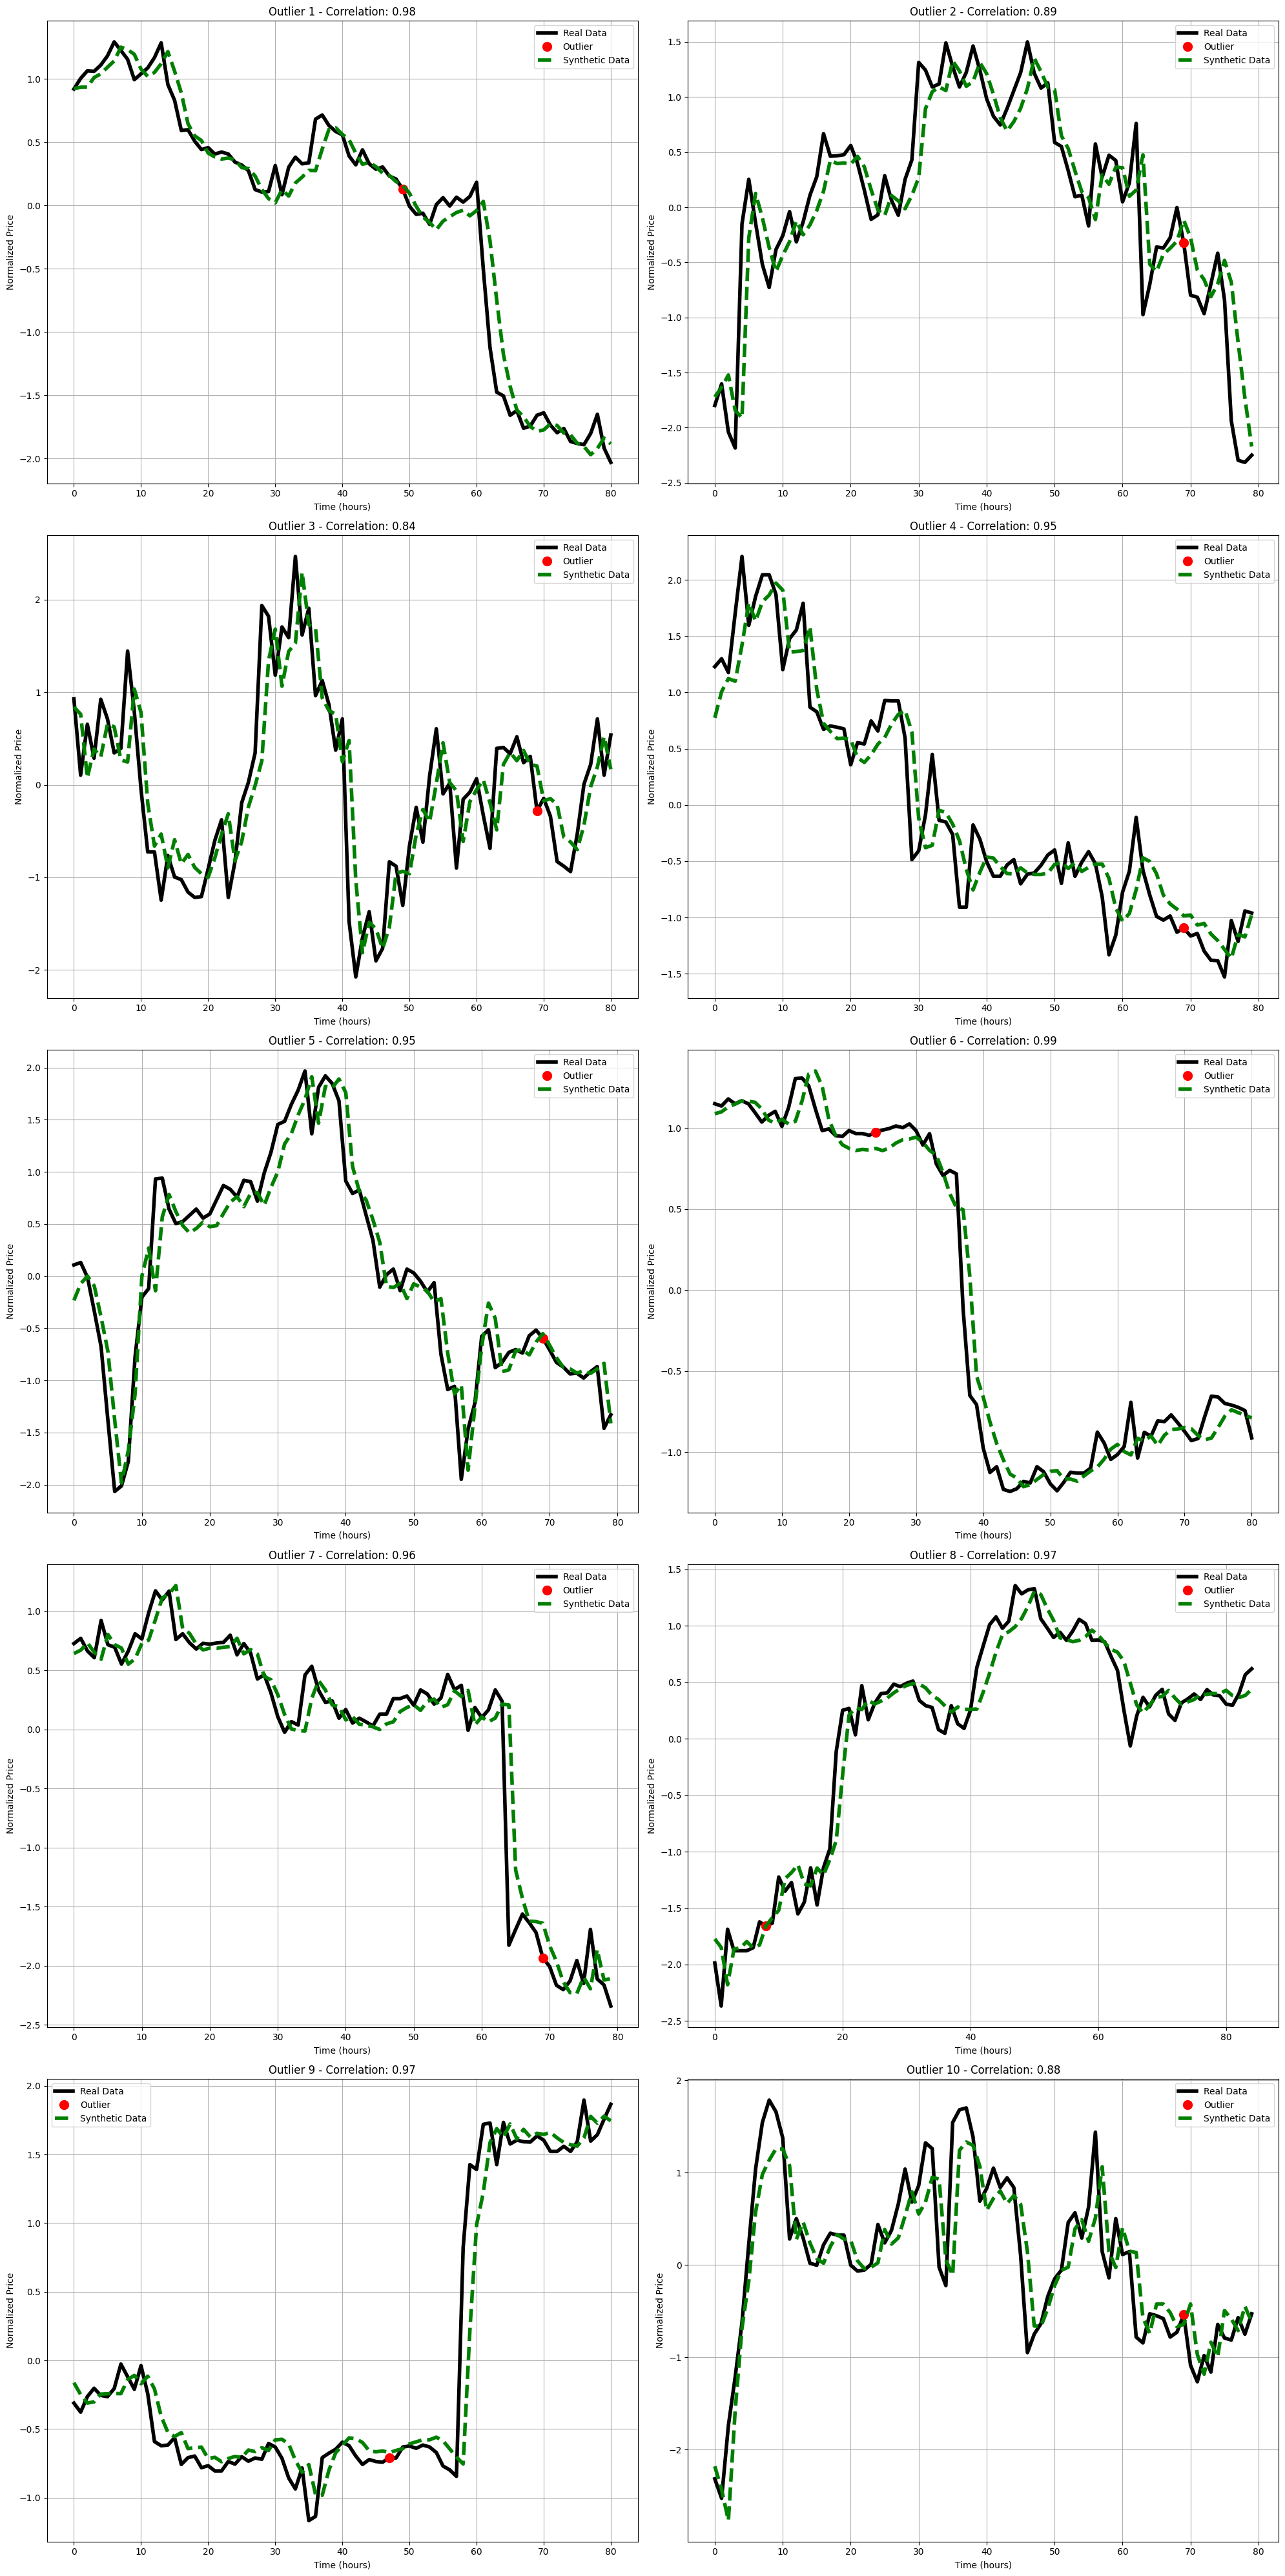

In [1]:
# Load the dataset
data = pd.read_csv('Outlier Dataset.csv')
data['date'] = pd.to_datetime(data['date'])

# Filter rows where 'outlier' is 1
outliers = data[data['outlier'] == 1]

# Generate date ranges for each outlier
date_ranges = pd.DataFrame({
    "start_date": outliers['date'] - timedelta(days=3),
    "end_date": outliers['date'] + timedelta(days=3),
    "outlier_date": outliers['date']
})

api_key = 'beBybSi8daPgsTp5yx5cHtHpYcrjp5Jq'
symbol = 'C:USDEUR'

# Plotting setup
fig, axs = plt.subplots(nrows=5, ncols=2, figsize=(20, 40))
axs = axs.flatten()

# Process each date range
for idx, (ax, (_, row)) in enumerate(zip(axs, date_ranges.iterrows())):
    hourly_data = fetch_hourly_data(symbol, row['start_date'].date(), row['end_date'].date(), api_key)
    
    # Fill missing values
    hourly_data.fillna(method='ffill', inplace=True)  # forward fill

    # Normalize data
    scaler = StandardScaler()
    hourly_data[['v', 'vw', 'o', 'c', 'h', 'l']] = scaler.fit_transform(hourly_data[['v', 'vw', 'o', 'c', 'h', 'l']])

    # Prepare data for LSTM
    n_features = 1
    n_timesteps = 3  # Number of timesteps per sequence
    X = []
    y = []

    for i in range(n_timesteps, len(hourly_data)):
        X.append(hourly_data[['c']].iloc[i-n_timesteps:i].values)
        y.append(hourly_data['c'].iloc[i])

    X = np.array(X)
    y = np.array(y)

    # Build and fit LSTM model
    model = Sequential([
        LSTM(50, activation='relu', input_shape=(n_timesteps, n_features)),
        Dense(1)
    ])
    model.compile(optimizer='adam', loss='mean_squared_error')
    model.fit(X, y, epochs=100, verbose=1)

    # Predict and generate synthetic data
    predicted = model.predict(X)
    noise = np.random.normal(0, 0.01, predicted.shape)
    synthetic_data = predicted + noise

    # Correlation calculation
    real_data = hourly_data['c'].iloc[n_timesteps:].values
    correlation, _ = pearsonr(real_data, synthetic_data.flatten())
    print(f'Packet {idx+1} - Correlation: {correlation}')

    # Find index of the outlier in the normalized data
    outlier_index = hourly_data.index[hourly_data['date'] == row['outlier_date']]
    
    # Plotting real vs synthetic data
    ax.plot(real_data, label='Real Data', color='black', linewidth=4)
    if not outlier_index.empty:
        ax.plot(outlier_index[0] - n_timesteps, real_data[outlier_index[0] - n_timesteps], 'ro', markersize=10, label='Outlier')  # Mark the outlier with a larger red dot
    ax.plot(synthetic_data.flatten(), label='Synthetic Data', color='green', linestyle='--', linewidth=4)
    ax.set_title(f'Outlier {idx + 1} - Correlation: {correlation:.2f}')
    ax.set_xlabel('Time (hours)')
    ax.set_ylabel('Normalized Price')
    ax.legend()
    ax.grid(True)

# Display all the plots
plt.tight_layout()
plt.show()